In [1]:
#this defaults plots to matplotlib 1.0 formatting
import matplotlib.style
import matplotlib as mpl
#mpl.style.use('classic')
%matplotlib inline
mpl.rcParams['figure.dpi']= 150

# importing packages needed to run this script 
from subprocess import call
import pickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch

import os
import time
import matplotlib.pyplot as plt
import numpy as np
import copy
import colorsys
import matplotlib.image as mpimg
from IPython.display import display
from IPython.display import Image
import scipy.cluster.hierarchy as sch
from scipy.stats import scoreatpercentile 
from pysca import scaTools as sca
# import mpld3
import pickle as pickle
from optparse import OptionParser
import sys
sys.path.append('../utilities/')

from graph_helpers import (
   gen_amino_acid_position_in_ref_sequence_graph,
   gen_clustered_similarity_matrix, 
   gen_unclustered_similarity_matrix,
)
from helpers import (
    show_processmsa_results,
    seq_count_check
)

%matplotlib inline

if not os.path.exists('../output/'):
    os.makedirs('../output/')  

In [2]:
path2aln_processed = '/home/bjohnson/rdb/data/trc8pfamalign.txt'
path2out = '../output/'
command =  str('scaProcessMSA -a %s -d %s -i 0' % (path2aln_processed, path2out))
print(command)
call(command,shell = 'True')
print("Executed")

scaProcessMSA -a /home/bjohnson/rdb/data/trc8pfamalign.txt -d ../output/ -i 0
Loaded alignment of 1333 sequences, 1525 positions.
Checking alignment for non-standard amino acids
Aligment size after removing sequences with non-standard amino acids: 1307
Trimming alignment for highly gapped positions (80% or more).
1307
Alignment size post-trimming: 520 positions
Looking for PDBs in home/bjohnson/pySCA-master/data/
using provided reference index 0
G3P4T2_GASAC/13-514
here!
len refseq 496, len refpos 520, len algseq 520, len pairalg 520, len gloalg 520
Conducting sequence and position filtering: alignment size is 1307 seqs, 520 pos
ATS should also have 520 positions - ATS: 520
Keeping 983 sequences of 1307 sequences (after filtering for gaps)
Keeping 939 sequences of 983 sequences (after filtering for seq similarity)
After filtering: alignment size is 939 seqs, 93 effective seqs, 474 pos
Final alignment parameters:
Number of sequences: M = 939
Number of effective sequences: M' = 90
Number

In [3]:
dbname = "trc8pfamalign.db"
pickle_path = '/home/bjohnson/rdb/output/trc8pfamalign.db'
db = pickle.load(open(pickle_path,'rb'))
Dseq = db['sequence']

In [4]:
show_processmsa_results(Dseq)

*****Final processed alignment parameters****
Number of sequences: M = 939
Number of effective sequences: M' = 90
Number of alignment positions: L = 474
Number of positions in the ats: 474
Number of structure positions mapped: 474
Missing key distmat
****************************************


In [5]:
# check for sufficient sequences in alignment
seq_count_check(Dseq)

The number of effective sequences in this MSA is: 90
This alignment does not have enough effective sequences to confidently analyze with SCA.
Npos (L) = 474


In [6]:
# Apply scaCore to our processed alignment 
command = 'scaCore -i %s' % (pickle_path)
print (command)
call(command, shell = 'True')
db = pickle.load(open(pickle_path,'rb'))
Dsca = db['sca']
print("Executed")

scaCore -i /home/bjohnson/rdb/output/trc8pfamalign.db
Computing the sequence projections.
basicICA failed to converge: 33.681321661230896
Computing sequence similarity matrix.
Computing the SCA conservation and correlation values.
Computing matrix randomizations...
Randomizations complete, 10 trials, time: 2.3 minutes
Calculations complete, writing to database file /home/bjohnson/rdb/output/trc8pfamalign
Executed


In [7]:
# run scaSectorID 
command = 'scaSectorID -i %s' % (pickle_path)
print (command)
call(command, shell = 'True')

# Load and store results of scaSectorID
db = pickle.load(open(pickle_path,'rb'))
Dsect = db['sector'] 
print("Executed")

scaSectorID -i /home/bjohnson/rdb/output/trc8pfamalign.db
Selected kpos=10 significant eigenmodes.
Calculations complete, writing to database file /home/bjohnson/rdb/output/trc8pfamalign
Executed


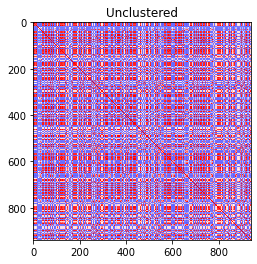

In [8]:
#check similarity matrix
gen_unclustered_similarity_matrix(title="Unclustered",Dsca=[Dsca])

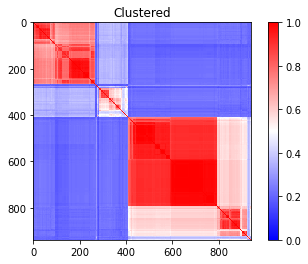

In [9]:
gen_clustered_similarity_matrix(title="Clustered", Dsca=[Dsca])

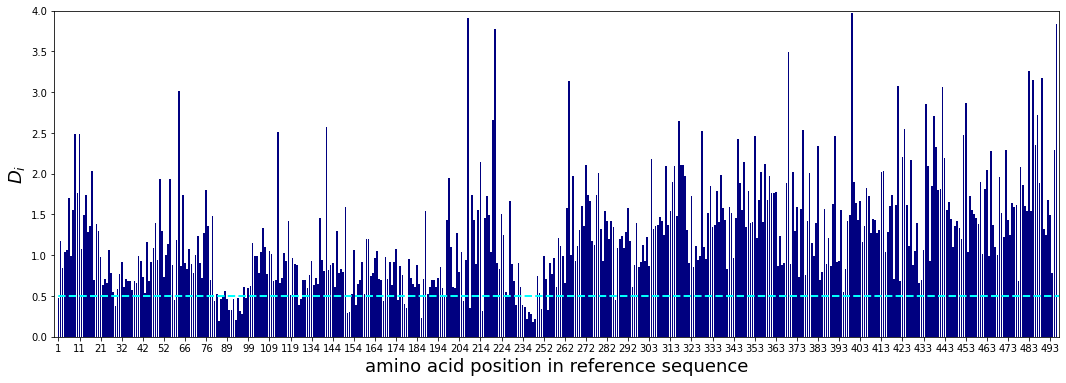

In [10]:
#Visualizing evolutionary conservation
gen_amino_acid_position_in_ref_sequence_graph(
    xlabel='amino acid position in reference sequence', 
    Dsca=[Dsca], 
    Dseq=[Dseq]
)